In [ ]:
# create for run task 2.3 XOR Gate

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip
import random
import time
import os
import random

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
f = 'drive/MyDrive/EECS522/mnist.pkl.gz'

In [6]:

def load_data(f):
    
    '''
    load the MNIST data as a tuple contraining the training dta, evaluation data, and the test data.
    Training data has two entries, one is actual training images, which is a numpy ndarray with 50,000 entries, each entry is a numpy ndarray with 784 (28*28) pixels in a single MNIST image
                                  the other is numpy ndarray containing 50,000 entries. Those entries are just the digit values (0...9) for the corresponding images contained in the first entry of the tuple. 
    The ``validation_data`` and ``test_data`` are similar, except each contains only 10,000 images.
    
     This is a nice data format, but for use in neural networks it's helpful to modify the format of the ``training_data`` a little. That's done in the wrapper function ``load_data_wrapper()``, see
below.
    '''
    
    f = gzip.open(f, 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    
    return (training_data, validation_data, test_data)

def load_data_wrapper(f):
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.
    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.
    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.
    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data(f)
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y,10) for y in tr_d[1]]
    training_data = list(zip(training_inputs, training_results))
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = list(zip(validation_inputs, va_d[1]))
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = list(zip(test_inputs, te_d[1]))
    
    return (training_data, validation_data, test_data)


def vectorized_result(j,n):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((n, 1))
    e[j] = 1.0
    return e

False

In [109]:
class Network(object):
    
    def __init__(self, sizes, weightype,seed):
        
        
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.seed  = seed
        # initialize weights and biases
        # by different scenairos
        # yangsong gu 10/30/2021, 5:36PM

        # if self.sizes[0] > 100:
        if 'norm' in weightype:
            print('norm')
            self.large_weight_initialization()
        elif 'uni' in weightype:
            print('uni')
            self.sym_uniform_weight_initialization()
        elif 'neg' in weightype:
            print('neg_uni')
            self.neg_uniform_weight_initialization()
        elif  'pos' in weightype:
            print('pos_uni')
            self.pos_uniform_weight_initialization()
        elif 'stdnorm' in weightype:
            print('stdnorm')
            self.small_weight_initialization()  
        # for momentum based gradient descent
        self.weights_vel = [np.zeros((y, x))
                        for x, y in zip(self.sizes[:-1], self.sizes[1:])]
        self.biases_vel = [np.zeros((y, 1)) for y in self.sizes[1:]]
        
  
    def large_weight_initialization(self):

        # from nielson book, which is basic initilization approach, 
        # the weights is not standardized. 
        random.seed(self.seed)
        self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
        random.seed(self.seed)
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(self.sizes[:-1], self.sizes[1:])]

    def small_weight_initialization(self):

        # standardized the weights, using sqrt(number of inputs)
        random.seed(self.seed)
        self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
        random.seed(self.seed)
        self.weights = [np.random.randn(y, x)/np.sqrt(x)
                        for x, y in zip(self.sizes[:-1], self.sizes[1:])]
    def pos_uniform_weight_initialization(self):

        # uniform distribution of weights      
        random.seed(self.seed)
        self.biases = [np.random.randn(y, 1)/np.sqrt(y) for y in self.sizes[1:]]
        random.seed(self.seed)
        self.weights = [np.random.uniform(low=0, high=1/np.sqrt(x), size=(y,x)) 
                        for x, y in zip(self.sizes[:-1], self.sizes[1:])]
    def neg_uniform_weight_initialization(self):

        # uniform distribution of weights      
        random.seed(self.seed)
        self.biases = [np.random.randn(y, 1)/np.sqrt(y) for y in self.sizes[1:]]
        random.seed(self.seed)
        self.weights = [np.random.uniform(low=-1/np.sqrt(x), high=0, size=(y,x)) 
                        for x, y in zip(self.sizes[:-1], self.sizes[1:])]
    def sym_uniform_weight_initialization(self):

        # uniform distribution of weights      
        random.seed(self.seed)
        self.biases = [np.random.randn(y, 1)/np.sqrt(y) for y in self.sizes[1:]]
        random.seed(self.seed)
        self.weights = [np.random.uniform(low=-1/np.sqrt(x), high=1/np.sqrt(x), size=(y,x)) 
                        for x, y in zip(self.sizes[:-1], self.sizes[1:])]

    def feedforward(self, a):
            
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):

            a = self.sigmoid(np.dot(w, a)+b)

        return a
        
    def SGD(self, training_data, epochs, mini_batch_size, eta, subtype, test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""

        training_data = list(training_data)
        n_train = len(training_data)


        loss_Tr = [] # loss of training set  use upper case T to denote a set of samples
        loss_Te = [] # loss of test set
        acc_Tr  = [] # accuracy of training set
        acc_Te  = [] # accuracy of test set
    
        f = open('drive/MyDrive/EECS522/newvision/newxor/{}_model_{}ep{}_mb{}_eta{}_sed{}.txt'.format(subtype,self.sizes, epochs,mini_batch_size, eta,self.seed), 'w')

        f.write('Layers {} learning rate: {}, min_batch: {}, epochs:{} \n'.format(self.sizes, 
                eta, mini_batch_size,epochs))
      

        f.write('epoch, loss_tr,loss_te, acc_tr, acc_te \n')
        
        if test_data:

            test_data = list(test_data)
            n_test = len(test_data)

        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n_train, mini_batch_size)]
            
            
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
                
            if test_data and (j % 20)==0:
                print("Epoch {}: {} / {}".format(j, self.evaluate(test_data), n_test))
                          
            else:
                # print("Epoch {} complete".format(j))
                print(end = '\r')
            
            # compute the loss for training data set
            loss_tr = [0.5 * np.sum((self.feedforward(x) - y)**2) for (x, y) in training_data]

            loss_Tr.append(sum(loss_tr))
            
            
        
            # write the accuracy to 
            # compute the loss for test data set
            if test_data:
                loss_te = [0.5 * np.sum((self.feedforward(x) - vectorized_result(y,self.sizes[-1]))**2) for (x, y ) in test_data]
                loss_Te.append(sum(loss_te))
            # compute the accuracy for training data

            res_tr = [(np.argmax(self.feedforward(x)), np.argmax(y)) for (x,y) in training_data]
            # acc_tr = self.evaluate(training_data) / n_train
            acc_tr = sum(int(x == y) for (x, y) in res_tr) / n_train

            acc_Tr.append(acc_tr)
            
            # accuracy of test set, y is not vectorized 
            if test_data:

                acc_te = self.evaluate(test_data) /n_test
                acc_Te.append(acc_te)
            
            f.write("{}, {:10}, {:10}, {:.5}, {:.5}\n".format(j, sum(loss_tr), sum(loss_te),acc_tr, acc_te))
            
        f.close()
        return loss_Tr, loss_Te, acc_Tr, acc_Te
    
    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def update_mini_batch_momentum(self, mini_batch,eta):

      # apply momentum to update weights and biases
      # ys g 6:20PM 10/30/2021
      nabla_b = [np.zeros(b.shape) for b in self.biases]
      nabla_w = [np.zeros(w.shape) for w in self.weights]
      for x, y in mini_batch:
          delta_nabla_b, delta_nabla_w = self.backprop(x, y)
          nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
          nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
      mu = 0.9 # momentum
      self.weights_vel = [mu * v - (eta/len(mini_batch)) * nw for v, nw in zip(self.weights_vel, nabla_w)]
      self.biases_vel = [mu * v - (eta/len(mini_batch)) * nw for v, nw in zip(self.biases_vel, nabla_b)]

      self.weights  = [w  + v for w, v in zip(self.weights, self.weights_vel)]
      self.biases = [b + v for b, v in zip(self.biases, self.biases_vel)]

    
    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = self.sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            self.sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    
    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""

        # modeified by Yangsong 
        # y --> np.argmax(y) if there are multiple maximum
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        
        return sum(int(x == y) for (x, y) in test_results)
    
    
    
    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)
    
    def sigmoid(self, z):
        '''simoid function'''
        return 1/(1+np.exp(-z))

    def sigmoid_prime(self, z):
        '''
        derivative of sigmoid function'''

        return self.sigmoid(z) * (1- self.sigmoid(z))

In [ ]:
## TASK 2.2

In [55]:
# XOR gate

def vectorized_y(j):
    """Return a 2-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere. This is used to convert a digit
    (0, 1) into a corresponding desired output from the neural
    network."""
    e = np.zeros((2, 1))
    e[j] = 1.0

    return e

def XOR_data():
    
    tr_x = np.array([[0,0],[1,0],[0,1], [1,1]])
    te_y = np.array([0,1,1,0])                 # dont vectorize y for test labels
    tr_input = [np.reshape(x, (2,1)) for x in tr_x]
    tr_y = [vectorized_y(i) for i in te_y]     # vectorize y for training labels

    train_data = list(zip(tr_input, tr_y))
    
    test_data = list(zip(tr_input, te_y))

    return train_data, test_data 


# network structure new

Epoch 0: 2 / 4
Epoch 20: 2 / 4
Epoch 40: 3 / 4
Epoch 60: 3 / 4
Epoch 80: 3 / 4
0.3976719379425049


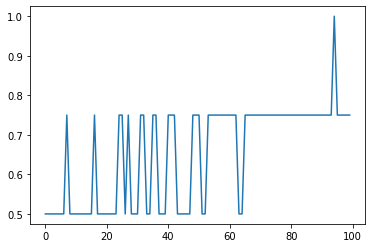

In [59]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2, 8, 4, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

Epoch 0: 2 / 4
Epoch 20: 3 / 4
Epoch 40: 3 / 4
Epoch 60: 3 / 4
Epoch 80: 4 / 4
0.12956619262695312


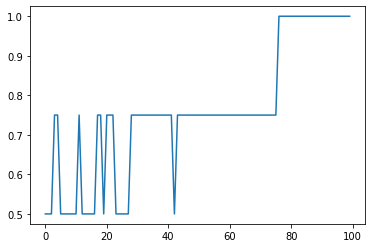

In [60]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,16, 8, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

Epoch 0: 2 / 4
Epoch 20: 1 / 4
Epoch 40: 3 / 4
Epoch 60: 3 / 4
Epoch 80: 3 / 4
0.2051098346710205


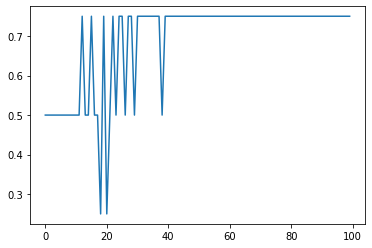

In [61]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,32, 16, 8, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

Epoch 0: 2 / 4
Epoch 20: 3 / 4
Epoch 40: 3 / 4
Epoch 60: 3 / 4
Epoch 80: 4 / 4
0.26201295852661133


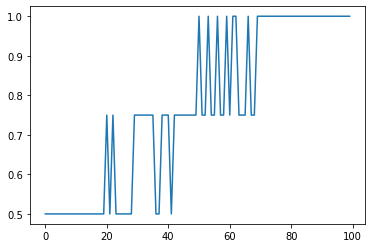

In [91]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,64, 32, 16, 8, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

Epoch 0: 2 / 4
Epoch 20: 3 / 4
Epoch 40: 4 / 4
Epoch 60: 4 / 4
Epoch 80: 4 / 4
0.2916734218597412


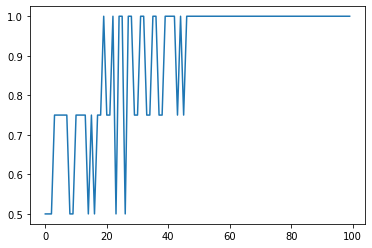

In [89]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,128,64, 32, 16, 8, 4, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

Epoch 0: 2 / 4
Epoch 20: 3 / 4
Epoch 40: 3 / 4
Epoch 60: 3 / 4
Epoch 80: 4 / 4
0.5605809688568115


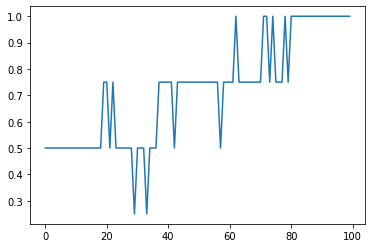

In [77]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,256, 128, 64, 32, 16, 8,4, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

Epoch 0: 2 / 4
Epoch 20: 4 / 4
Epoch 40: 4 / 4
Epoch 60: 4 / 4
Epoch 80: 4 / 4
1.2641799449920654


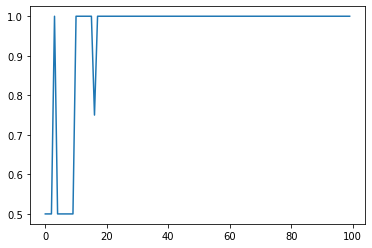

In [76]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,512, 256, 128, 64, 32, 16, 8,4, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

Epoch 0: 2 / 4
Epoch 20: 4 / 4
Epoch 40: 4 / 4
Epoch 60: 4 / 4
Epoch 80: 4 / 4
1.194380521774292


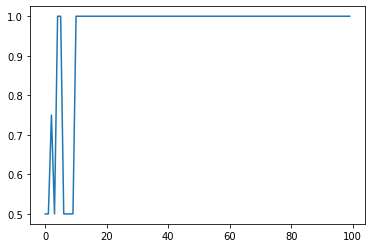

In [84]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,512, 256, 128, 64, 32,16,8, 4, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

Epoch 0: 2 / 4
Epoch 20: 2 / 4
Epoch 40: 3 / 4
Epoch 60: 3 / 4
Epoch 80: 4 / 4
1.1216843128204346


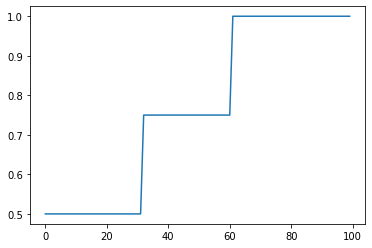

In [92]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':0.1, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,512, 256, 128, 64, 32,16,8, 4, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

Epoch 0: 2 / 4
Epoch 20: 2 / 4
Epoch 40: 2 / 4
Epoch 60: 2 / 4
Epoch 80: 2 / 4
1.1748239994049072


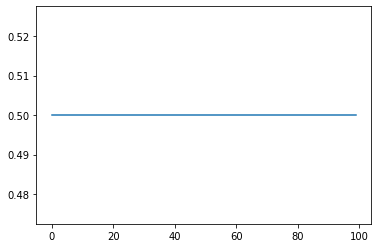

In [93]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':0.01, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,512, 256, 128, 64, 32,16,8, 4, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

Epoch 0: 2 / 4
Epoch 20: 2 / 4
Epoch 40: 2 / 4
Epoch 60: 2 / 4
Epoch 80: 2 / 4
1.1336839199066162


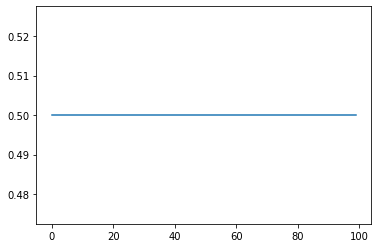

In [94]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':0.001, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,512, 256, 128, 64, 32,16,8, 4, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

Epoch 0: 2 / 4
Epoch 20: 2 / 4
Epoch 40: 4 / 4
Epoch 60: 4 / 4
Epoch 80: 4 / 4
1.2317087650299072


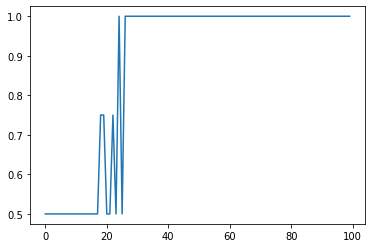

In [95]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':3, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,512, 256, 128, 64, 32,16,8, 4, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

Epoch 0: 2 / 4
Epoch 20: 2 / 4
Epoch 40: 2 / 4
Epoch 60: 2 / 4
Epoch 80: 2 / 4
1.1491761207580566


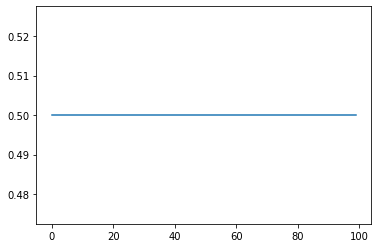

In [96]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':10, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,512, 256, 128, 64, 32,16,8, 4, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

Epoch 0: 2 / 4
Epoch 20: 2 / 4
Epoch 40: 2 / 4
Epoch 60: 2 / 4
Epoch 80: 2 / 4
1.1895124912261963


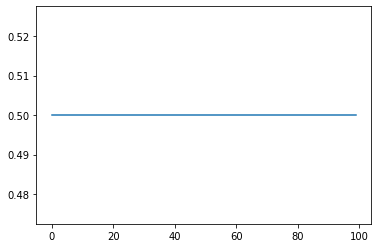

In [97]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':100, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,512, 256, 128, 64, 32,16,8, 4, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

pos_uni
Epoch 0: 2 / 4
Epoch 20: 2 / 4
Epoch 40: 2 / 4
Epoch 60: 2 / 4
Epoch 80: 2 / 4
1.1251225471496582


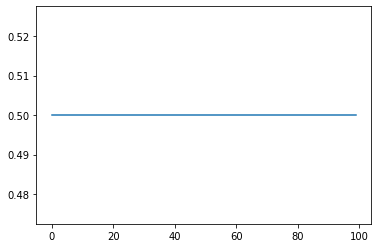

In [106]:
# adjust network structure 0
# pos uniform
model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_pos'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,512, 256, 128, 64, 32,16,8, 4, 2], weightype = 'pos', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

neg_uni
Epoch 0: 2 / 4
Epoch 20: 2 / 4
Epoch 40: 2 / 4
Epoch 60: 1 / 4
Epoch 80: 2 / 4
1.1809687614440918


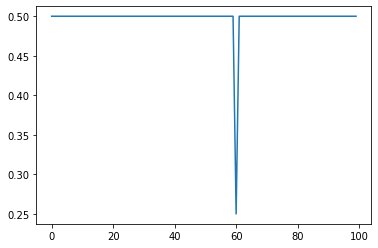

In [107]:
# adjust network structure 0
# pos uniform
model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_neg'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,512, 256, 128, 64, 32,16,8, 4, 2], weightype = 'neg', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

uni
Epoch 0: 2 / 4
Epoch 20: 2 / 4
Epoch 40: 2 / 4
Epoch 60: 2 / 4
Epoch 80: 2 / 4
1.1614551544189453


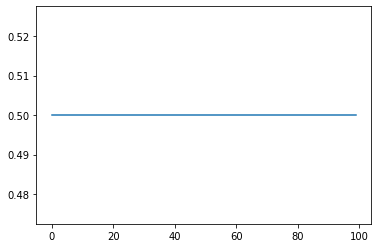

In [111]:
# adjust network structure 0
# pos uniform
model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_sym'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,512, 256, 128, 64, 32,16,8, 4, 2], weightype = 'uni', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

norm
Epoch 0: 2 / 4
Epoch 20: 4 / 4
Epoch 40: 4 / 4
Epoch 60: 4 / 4
Epoch 80: 4 / 4
1.1367480754852295


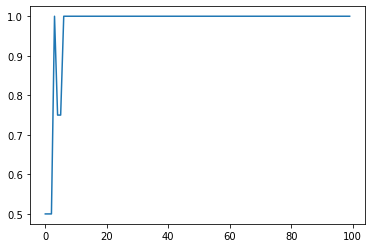

In [112]:
# adjust network structure 0

model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_mom'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2,512, 256, 128, 64, 32,16,8, 4, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

inversely

Epoch 0: 2 / 4
Epoch 20: 2 / 4
Epoch 40: 3 / 4
Epoch 60: 2 / 4
Epoch 80: 3 / 4
0.18158912658691406


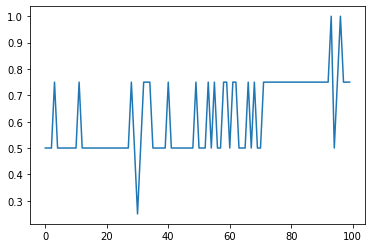

In [85]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2, 8,16, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

Epoch 0: 2 / 4
Epoch 20: 2 / 4
Epoch 40: 3 / 4
Epoch 60: 3 / 4
Epoch 80: 4 / 4
0.16901636123657227


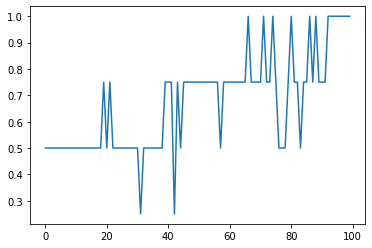

In [86]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2, 8, 16,32, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

Epoch 0: 2 / 4
Epoch 20: 2 / 4
Epoch 40: 2 / 4
Epoch 60: 2 / 4
Epoch 80: 2 / 4
0.25430941581726074


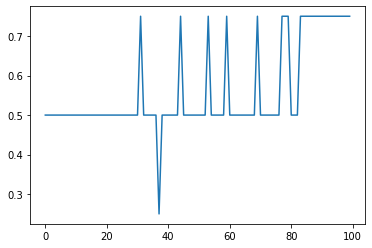

In [87]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2, 8,16,32,64, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

Epoch 0: 2 / 4
Epoch 20: 2 / 4
Epoch 40: 2 / 4
Epoch 60: 2 / 4
Epoch 80: 2 / 4
0.2820580005645752


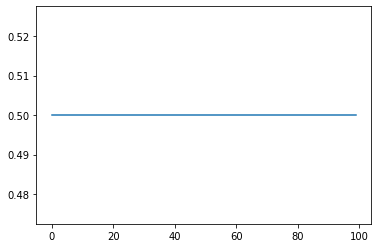

In [88]:
# adjust network structure 0
model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_stdnorm'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2, 8,16,32,64,128, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)

In [ ]:
# adjust network structure 0
# postive uniform
model = {'min_batch':1, 'epoches':100, 'learningrate':1, 'comment': 'XOR_raw_pos'}
t1 = time.time()
training_data, test_data = XOR_data()
seed = 522
net = Network([2, 8,16,32,64,128, 2], weightype = 'stdnorm', seed = seed)
loss_Tr, loss_Te, acc_tr, acc_Te = net.SGD(training_data, model['epoches'] , model['min_batch'], model['learningrate'], model['comment'], test_data = test_data)
plt.plot(acc_Te)
print(time.time() - t1)